In [27]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib.colors import to_hex, to_rgb
import matplotlib.pyplot as plt


In [28]:
def read_and_preprocess_image(image_path):
    """
    Reads an image from the given path and converts it to RGB format.

    Parameters:
        image_path (str): Path to the image file.

    Returns:
        np.ndarray: RGB image.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [29]:
def extract_colors_with_codes(image_path, num_colors):
    """
    Extracts the dominant colors from an image and their HEX codes.

    Parameters:
        image (np.ndarray): RGB image.
        num_colors (int): Number of dominant colors to extract.

    Returns:
        tuple: (list of RGB colors, list of HEX codes, list of pixel counts)
    """
    # Reshape the image to a 2D array of pixels
    image = read_and_preprocess_image(image_path)
    plt.imshow(image)
    plt.title("Saree Image")
    plt.axis("off")
    plt.show()
    pixels = image.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_colors, random_state=42, n_init=10)
    kmeans.fit(pixels)

    # Get the cluster centers (colors) and labels
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # Count the number of pixels assigned to each cluster
    counts = Counter(labels)

    # Sort colors by predominance
    sorted_colors = [colors[i] for i in counts.keys()]
    sorted_counts = [counts[i] for i in counts.keys()]

    # Convert colors to HEX codes
    hex_codes = [to_hex(np.array(color) / 255) for color in sorted_colors]

    return sorted_colors, hex_codes, sorted_counts


In [30]:
def display_color_codes(colors, hex_codes, counts):
    """
    Displays RGB values, HEX codes, and proportions of the colors.

    Parameters:
        colors (list): List of RGB colors.
        hex_codes (list): List of HEX codes.
        counts (list): List of pixel counts for each color.
    """
    total_pixels = sum(counts)
    print("\nDominant Colors and HEX Codes:")
    for color, hex_code, count in zip(colors, hex_codes, counts):
        proportion = count / total_pixels * 100
        print(f"RGB: {color}, HEX: {hex_code}, Proportion: {proportion:.2f}%")

In [31]:
def plot_colors(colors, counts):
    """Plots a bar chart of colors by their proportions."""
    total_pixels = sum(counts)
    proportions = [count / total_pixels for count in counts]

    plt.figure(figsize=(8, 4))
    for i, (color, proportion) in enumerate(zip(colors, proportions)):
        plt.bar(i, proportion, color=np.array(color) / 255, edgecolor="black")

    plt.xticks(range(len(colors)), [f"Color {i+1}" for i in range(len(colors))])
    plt.ylabel("Proportion")
    plt.title("Color Proportions in Saree")
    plt.show()

In [32]:
def calculate_saree_cost(colors, counts, paint_costs):
    """Calculates the saree cost based on color proportions and paint costs."""
    total_pixels = sum(counts)
    total_cost = 0

    for color, count in zip(colors, counts):
        r, g, b = color
        fraction = count / total_pixels
        cost = (r * paint_costs['R'] + g * paint_costs['G'] + b * paint_costs['B']) * fraction
        total_cost += cost

    return total_cost

In [33]:
def calculate_color_mixing(target_hex):
    """
    Suggests basic colors to mix for approximating the target HEX color.

    Parameters:
        target_hex (str): Target HEX color code.
    """
    # Convert HEX to RGB
    target_rgb = np.array(to_rgb(target_hex)) * 255

    # Define basic colors for mixing
    basic_colors = {
        "Red": np.array([255, 0, 0]),
        "Green": np.array([0, 255, 0]),
        "Blue": np.array([0, 0, 255]),
        "White": np.array([255, 255, 255]),
        "Black": np.array([0, 0, 0])
    }

    print(f"\nTarget Color RGB: {target_rgb}")
    print("\nMixing Suggestions:")

    # Calculate proportions (simple approximation)
    proportions = {color: np.linalg.norm(target_rgb - value) for color, value in basic_colors.items()}
    sorted_proportions = sorted(proportions.items(), key=lambda x: x[1])

    for color, distance in sorted_proportions:
        print(f"Mix with {color}: Distance = {distance:.2f}")


In [34]:
def main():
    image_path = "../training_data/002.jpeg"
    paint_costs = {'R': 0.5, 'G': 0.3, 'B': 0.2}
    num_colors=8
    # Extract colors and display information
    colors, hex_codes, counts = extract_colors_with_codes(image_path, num_colors)
    display_color_codes(colors, hex_codes, counts)

    # Plot color proportions
    plot_colors(colors, counts)

    # Calculate saree cost
    saree_cost = calculate_saree_cost(colors, counts, paint_costs)
    print(f"\nEstimated Saree Cost: {saree_cost:.2f}")

    # Analyze mixing for the most dominant color
    print(f"\nAnalyzing Mixing for Dominant Color: {hex_codes[0]}")
    calculate_color_mixing(hex_codes[0])

    # Display the saree image
    # image = read_and_preprocess_image(image_path)
    # plt.imshow(image)
    # plt.title("Saree Image")
    # plt.axis("off")
    # plt.show()

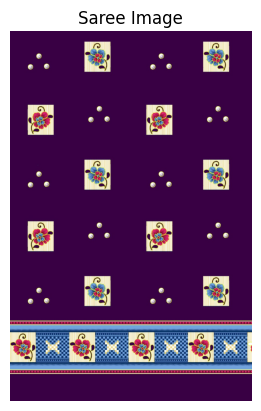


Dominant Colors and HEX Codes:
RGB: [56  0 67], HEX: #380043, Proportion: 76.91%
RGB: [152 140 103], HEX: #988c67, Proportion: 1.01%
RGB: [226 216 150], HEX: #e2d896, Proportion: 5.11%
RGB: [253 250 223], HEX: #fdfadf, Proportion: 4.80%
RGB: [118  20  42], HEX: #76142a, Proportion: 1.75%
RGB: [112 158 212], HEX: #709ed4, Proportion: 5.27%
RGB: [ 13  52 105], HEX: #0d3469, Proportion: 3.65%
RGB: [200  43  94], HEX: #c82b5e, Proportion: 1.50%


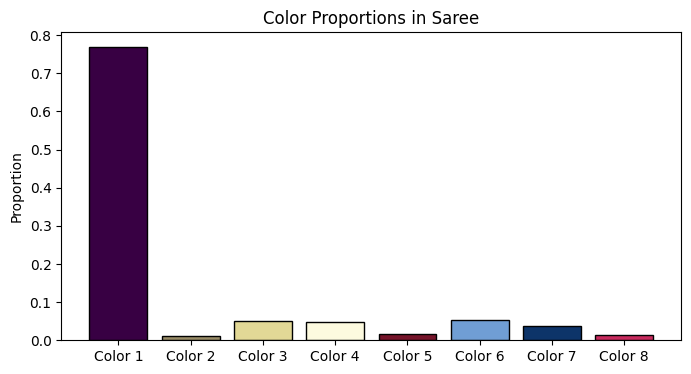


Estimated Saree Cost: 68.19

Analyzing Mixing for Dominant Color: #380043

Target Color RGB: [56.  0. 67.]

Mixing Suggestions:
Mix with Black: Distance = 87.32
Mix with Blue: Distance = 196.16
Mix with Red: Distance = 209.98
Mix with Green: Distance = 269.54
Mix with White: Distance = 374.13


In [35]:
if __name__ == "__main__":
    main()
